In [29]:
import requests
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
notebook_path = os.path.abspath(".")

In [30]:
covidDataJSON = requests.request("GET", "https://covidtracking.com/api/states/daily")

In [31]:
df_covid = pd.read_json(covidDataJSON.text)
df_new_york = df_covid.loc[df_covid['state'] == "NY"].astype({"date":"str"})
df_new_york["date"] = pd.to_datetime(df_new_york["date"], format= "%Y%m%d")
df_new_york["s_date"] = df_new_york["date"].dt.strftime("%m-%d")
df_new_york = df_new_york.set_index("date").sort_index()

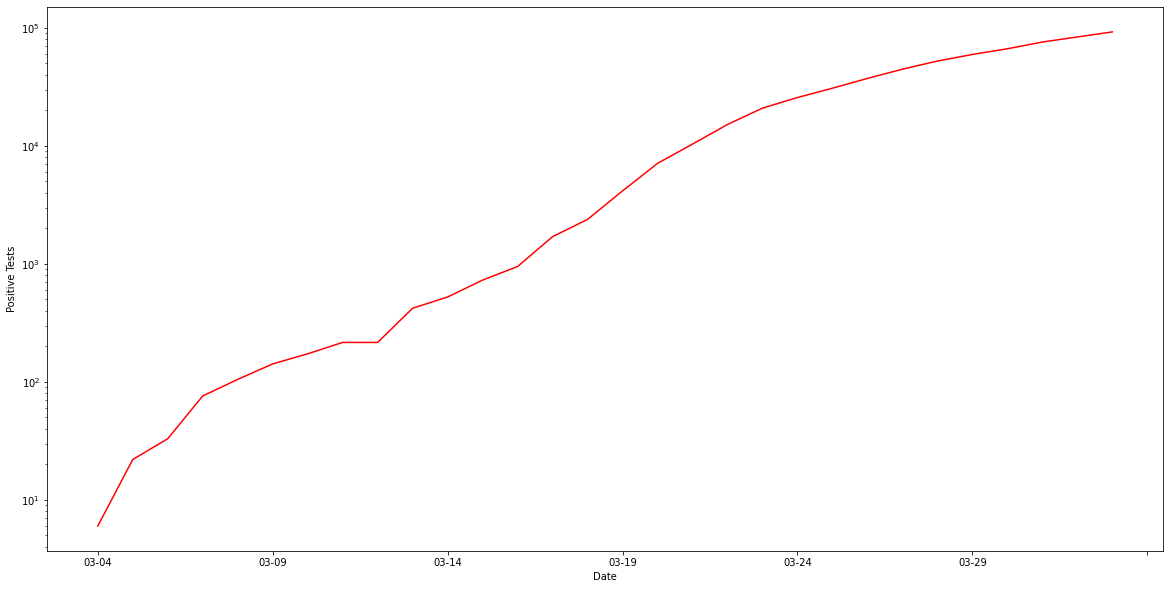

In [32]:
ax = plt.gca()
df_new_york.plot(kind="line",y="positive", x="s_date", color="red", ax=ax)
ax.set_xlabel("Date")
ax.set_ylabel("Positive Tests")
ax.get_legend().remove()
plt.yscale("log")
plt_ny_positives = plt.gcf()
plt_ny_positives.set_size_inches(20, 10)
plt_ny_positives.savefig("log-history.png")

In [33]:
df_pos_pct_change = df_new_york["positive"].pct_change().to_frame()
df_pos_pct_change["s_date"] = df_pos_pct_change.index.strftime('%m-%d')

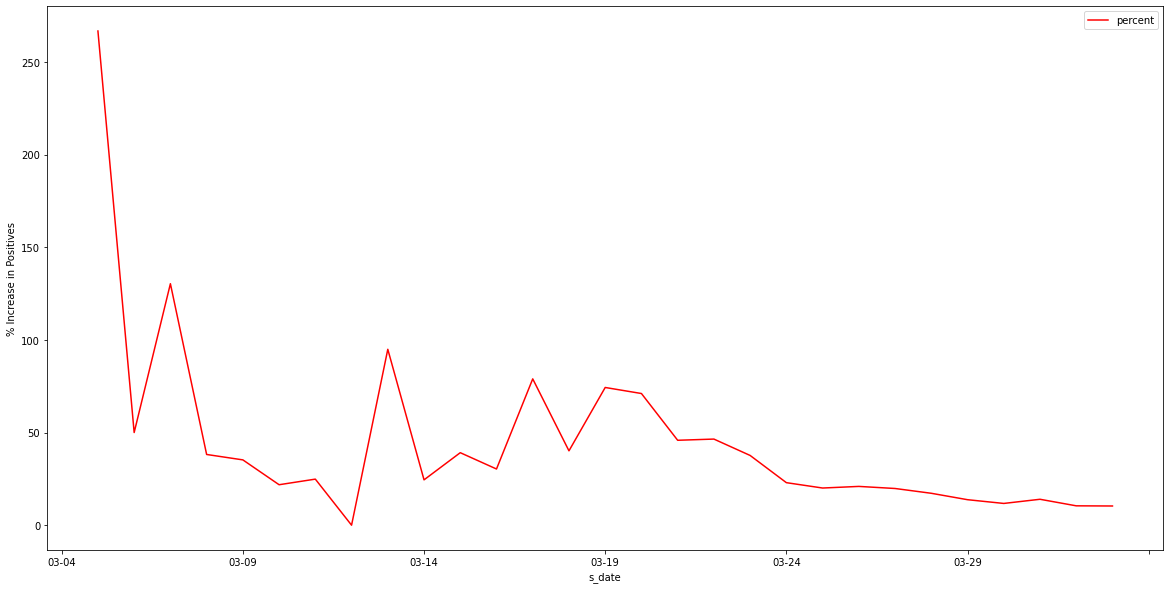

In [34]:
ax = plt.gca()
ax.set_xlabel("Date")
ax.set_ylabel("% Increase in Positives")
df_pos_pct_change["percent"] = df_pos_pct_change["positive"] * 100
df_pos_pct_change.plot(kind="line",y="percent", x="s_date", color="red", ax=ax)
plt_ny_pct_change = plt.gcf()
plt_ny_pct_change.set_size_inches(20, 10)

In [35]:
df_pos_pct_change["seconds"] = 0
df_pos_pct_change.dtypes
df_pos_pct_change["seconds"] = (df_pos_pct_change.index - datetime.datetime(1970,1,1)).total_seconds()
df_pos_pct_change

,positive,s_date,percent,seconds
date,,,,
2020-03-04,NaN,03-04,NaN,1.583280e+09
2020-03-05,2.666667,03-05,266.666667,1.583366e+09
2020-03-06,0.500000,03-06,50.000000,1.583453e+09
2020-03-07,1.303030,03-07,130.303030,1.583539e+09
2020-03-08,0.381579,03-08,38.157895,1.583626e+09
2020-03-09,0.352381,03-09,35.238095,1.583712e+09
2020-03-10,0.218310,03-10,21.830986,1.583798e+09
2020-03-11,0.248555,03-11,24.855491,1.583885e+09
2020-03-12,0.000000,03-12,0.000000,1.583971e+09


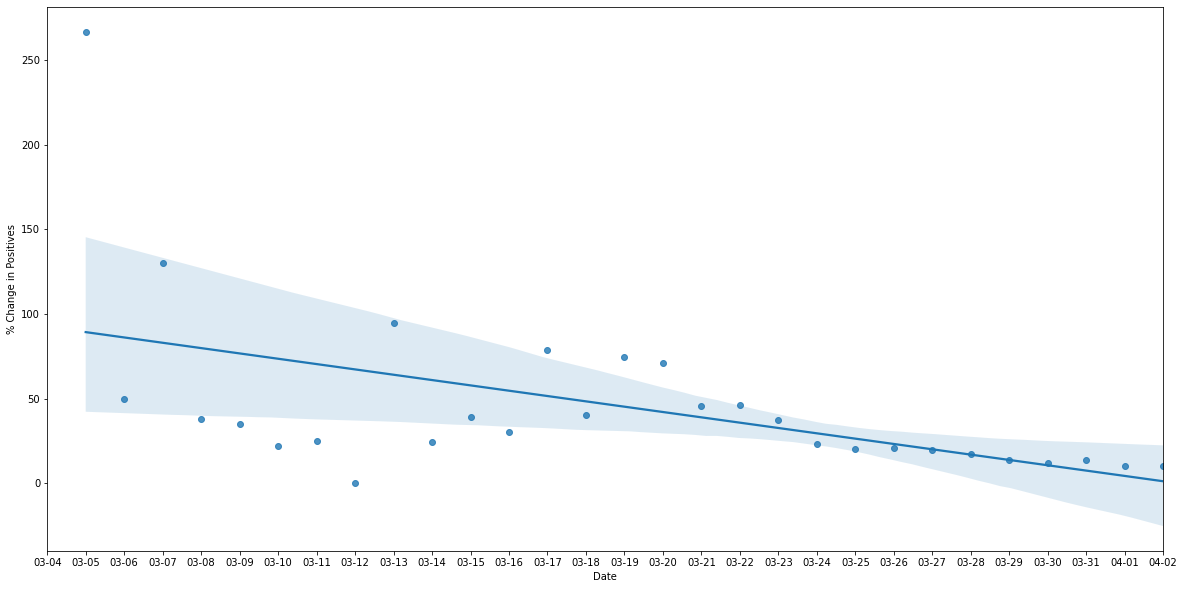

In [36]:
ax = plt.gca()
ax.set_xlabel("Date")
ax.set_ylabel("% Increase in Positives")
sns.regplot(x='seconds',y='percent',data=df_pos_pct_change, fit_reg=True)
plt.xticks(ticks=df_pos_pct_change["seconds"], labels=df_pos_pct_change["s_date"])
ax.set_xlabel("Date")
ax.set_ylabel("% Change in Positives")
plt_ny_pct_change_best_fit = plt.gcf()
plt_ny_pct_change_best_fit.set_size_inches(20, 10)
plt_ny_pct_change_best_fit.savefig("percent-change-best-fit.png")